<a href="https://colab.research.google.com/github/manojmukkamala/VolcanoesOnVenus/blob/master/LogisticModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set Up

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import pickle

%matplotlib inline

In [0]:
pickle_in = open("/content/drive/My Drive/VolcanoesOnVenus/volcanoes_dataset.pickle", "rb")
volcanoes_dataset = pickle.load(pickle_in)
((X_train, y_train), (X_val, y_val), (X_test, y_test)) = volcanoes_dataset

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

def print_report(y_val, y_val_pred):
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')

In [0]:
def plot_accuracy(the_model):
    plt.plot(the_model.history['acc'], label = 'Train')
    plt.plot(the_model.history['val_acc'], label = 'Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [0]:
def plot_loss(the_model):
    plt.plot(the_model.history['loss'], label = 'Train')
    plt.plot(the_model.history['val_loss'], label = 'Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Logistic Regression

#### Hand Crafted Model

In [0]:
import my_nn_utils as my_net

##### Iteration 1

- Number of Iterations: 1000
- Learning Rate: 0.01

Cost after epoch 0: 0.451016
Cost after epoch 100: 0.435068
Cost after epoch 200: 0.425579
Cost after epoch 300: 0.416707
Cost after epoch 400: 0.408390
Cost after epoch 500: 0.400575
Cost after epoch 600: 0.393212
Cost after epoch 700: 0.386256
Cost after epoch 800: 0.379667
Cost after epoch 900: 0.373408
Train accuracy: 84.18571907722978 %


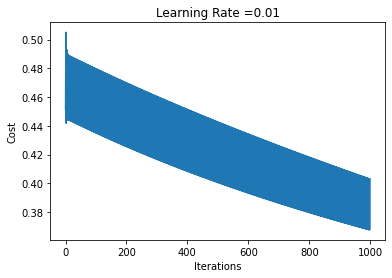

CPU times: user 9min 39s, sys: 1min 21s, total: 11min 1s
Wall time: 5min 33s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train,
                               layers_dims = [X_train.shape[1], 1], activations = ['sigmoid'],
                               num_iterations = 1000, learning_rate = 0.01, print_cost = True, print_every = 100)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['sigmoid'])
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  82.24903820200382


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1834
           1       0.67      0.10      0.17       353

    accuracy                           0.85      2187
   macro avg       0.76      0.54      0.54      2187
weighted avg       0.82      0.85      0.80      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1817   17]
 [ 318   35]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [0]:
pd.Series(y_val).value_counts()

0    1834
1     353
dtype: int64

In [0]:
pd.Series(y_val_pred.reshape(-1,)).value_counts()

0.0    2135
1.0      52
dtype: int64

##### Iteration 2

- Number of Iterations: 1000
- Learning Rate: 0.005

Cost after epoch 0: 0.451016
Cost after epoch 100: 0.410707
Cost after epoch 200: 0.405742
Cost after epoch 300: 0.400964
Cost after epoch 400: 0.396362
Cost after epoch 500: 0.391927
Cost after epoch 600: 0.387653
Cost after epoch 700: 0.383531
Cost after epoch 800: 0.379555
Cost after epoch 900: 0.375717
Train accuracy: 85.40644969534848 %


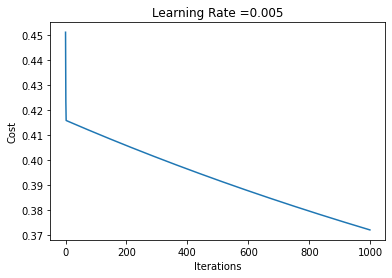

CPU times: user 10min 11s, sys: 1min 24s, total: 11min 36s
Wall time: 5min 51s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train,
                               layers_dims = [X_train.shape[1], 1], activations = ['sigmoid'],
                               num_iterations = 1000, learning_rate = 0.005, print_cost = True, print_every = 100)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['sigmoid'])
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  83.642419593353


In [0]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.14      0.00      0.01       353

    accuracy                           0.84      2187
   macro avg       0.49      0.50      0.46      2187
weighted avg       0.73      0.84      0.76      2187

Confusion Matrix:
[[1828    6]
 [ 352    1]]


##### Iteration 3

- Number of Iterations: 5000
- Learning Rate: 0.005

Cost after epoch 0: 0.451016
Cost after epoch 1000: 0.372011
Cost after epoch 2000: 0.341026
Cost after epoch 3000: 0.318142
Cost after epoch 4000: 0.300494
Train accuracy: 83.44907129043399 %


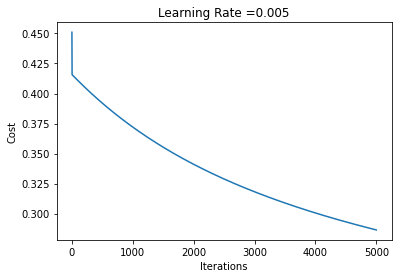

CPU times: user 48min 14s, sys: 6min 48s, total: 55min 2s
Wall time: 27min 42s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train,
                               layers_dims = [X_train.shape[1], 1], activations = ['sigmoid'],
                               num_iterations = 5000, learning_rate = 0.005, print_cost = True, print_every = 1000)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['sigmoid'])
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  81.59879355270753


In [0]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1834
           1       0.78      0.16      0.27       353

    accuracy                           0.86      2187
   macro avg       0.82      0.58      0.59      2187
weighted avg       0.85      0.86      0.82      2187

Confusion Matrix:
[[1818   16]
 [ 296   57]]


#### SKLearn Model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Iteration 1

In [0]:
%%time

sk_log = LogisticRegression(n_jobs = -1)
sk_log.fit(X_train, y_train)
y_val_pred = sk_log.predict(X_val)

CPU times: user 1.76 s, sys: 338 ms, total: 2.09 s
Wall time: 3min 28s


In [0]:
print("Train Accuracy: ", accuracy_score(y_train, sk_log.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

Train Accuracy:  0.9943528013077724
Validation Accuracy:  0.9236396890717878


In [0]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1834
           1       0.82      0.67      0.74       353

    accuracy                           0.92      2187
   macro avg       0.88      0.82      0.85      2187
weighted avg       0.92      0.92      0.92      2187

Confusion Matrix:
[[1783   51]
 [ 116  237]]


##### Iteration 2

In [0]:
%%time

sk_log = LogisticRegression(penalty = 'none', n_jobs = -1)
sk_log.fit(X_train, y_train)
y_val_pred = sk_log.predict(X_val)

CPU times: user 2.28 s, sys: 398 ms, total: 2.67 s
Wall time: 3min 26s


In [0]:
print("Train Accuracy: ", accuracy_score(y_train, sk_log.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

Train Accuracy:  0.9953930747510774
Validation Accuracy:  0.9099222679469593


In [0]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1834
           1       0.76      0.65      0.70       353

    accuracy                           0.91      2187
   macro avg       0.85      0.80      0.82      2187
weighted avg       0.91      0.91      0.91      2187

Confusion Matrix:
[[1761   73]
 [ 124  229]]


##### Iteration 3

In [0]:
%%time

sk_log = LogisticRegression(solver = 'saga', n_jobs = -1)
sk_log.fit(X_train, y_train)
y_val_pred = sk_log.predict(X_val)

CPU times: user 1min 26s, sys: 75.2 ms, total: 1min 26s
Wall time: 1min 26s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
print("Train Accuracy: ", accuracy_score(y_train, sk_log.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

Train Accuracy:  0.9511071481646605
Validation Accuracy:  0.9144947416552355


In [0]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1834
           1       0.85      0.58      0.68       353

    accuracy                           0.91      2187
   macro avg       0.88      0.78      0.82      2187
weighted avg       0.91      0.91      0.91      2187

Confusion Matrix:
[[1797   37]
 [ 150  203]]


##### Iteration 4

In [0]:
%%time

sk_log = LogisticRegression(solver = 'saga', penalty = 'none', n_jobs = -1)
sk_log.fit(X_train, y_train)
y_val_pred = sk_log.predict(X_val)

CPU times: user 1min 26s, sys: 72.8 ms, total: 1min 26s
Wall time: 1min 26s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
print("Train Accuracy: ", accuracy_score(y_train, sk_log.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

Train Accuracy:  0.9521474216079655
Validation Accuracy:  0.9163237311385459


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1834
           1       0.85      0.59      0.69       353

    accuracy                           0.92      2187
   macro avg       0.89      0.78      0.82      2187
weighted avg       0.91      0.92      0.91      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1797   37]
 [ 146  207]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


#### Keras

In [0]:
import tensorflow as tf

##### Iterations 1

- Number of Epochs: 100
- Batch Size: Batch

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = len(y_train), verbose = 0, shuffle = True)

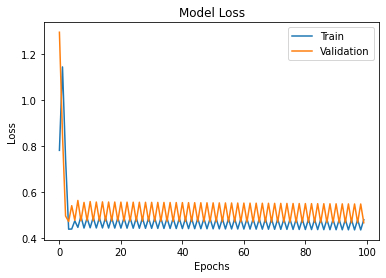

In [0]:
plot_loss(vol_model)

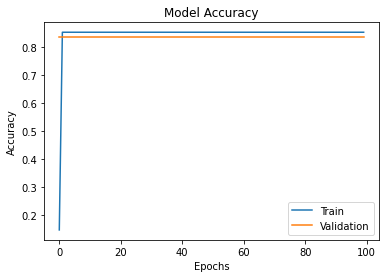

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.8540645
Test Accuracy:  0.8385917


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Iteration 2

- Number of Epochs: 100
- Batch Size: Default

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 0, shuffle = True)

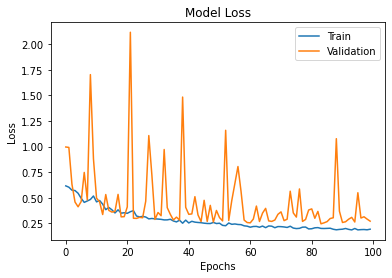

In [0]:
plot_loss(vol_model)

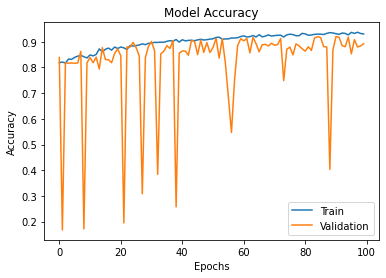

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.9249517
Test Accuracy:  0.8920896


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1834
           1       0.87      0.39      0.54       353

    accuracy                           0.89      2187
   macro avg       0.88      0.69      0.74      2187
weighted avg       0.89      0.89      0.87      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1814   20]
 [ 216  137]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 3

- Number of Epochs: 100
- Batch Size: 1

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 1, verbose = 0, shuffle = True)

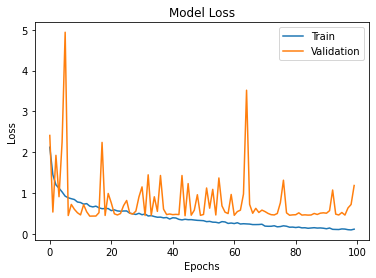

In [0]:
plot_loss(vol_model)

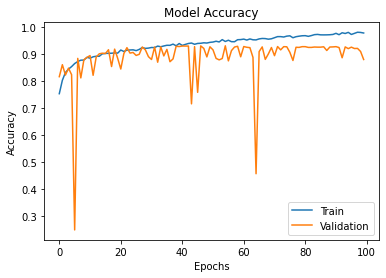

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.9181156
Test Accuracy:  0.87974393


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1834
           1       0.88      0.29      0.44       353

    accuracy                           0.88      2187
   macro avg       0.88      0.64      0.69      2187
weighted avg       0.88      0.88      0.85      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1820   14]
 [ 249  104]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 4

- Number of Epochs: 100
- Batch Size: 1
- Optimizer: Adam

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 1, verbose = 0, shuffle = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


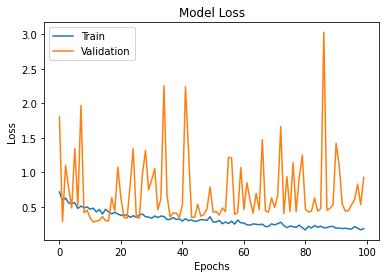

In [0]:
plot_loss(vol_model)

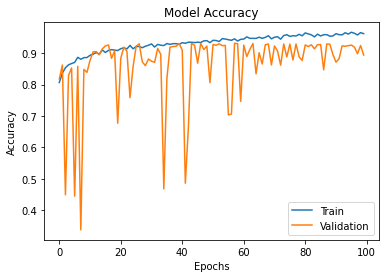

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.9404072
Test Accuracy:  0.89391863


In [0]:
print_report(y_val, y_val_pred)

##### Iteration 5

- Number of Epochs: 1000
- Batch Size: Default
- Optimizer: Adam

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 1000, verbose = 0, shuffle = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


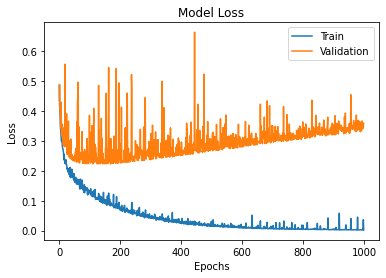

In [0]:
plot_loss(vol_model)

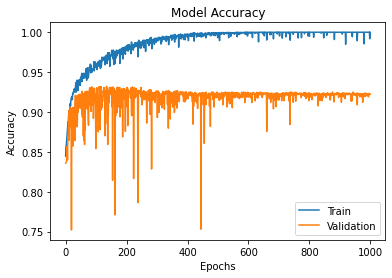

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  1.0
Test Accuracy:  0.922268


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1834
           1       0.83      0.66      0.73       353

    accuracy                           0.92      2187
   macro avg       0.88      0.82      0.84      2187
weighted avg       0.92      0.92      0.92      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1785   49]
 [ 121  232]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
